# Customer Segmentation with K-Means Clustering

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset 
df1=pd.read_csv("G:\Data science\Datasets\Cust_Segmentation.csv")
df1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
#cleaning dataset
df=df1.drop(columns=['Address','Customer Id'],axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
#information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [5]:
#Statistical analysis
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


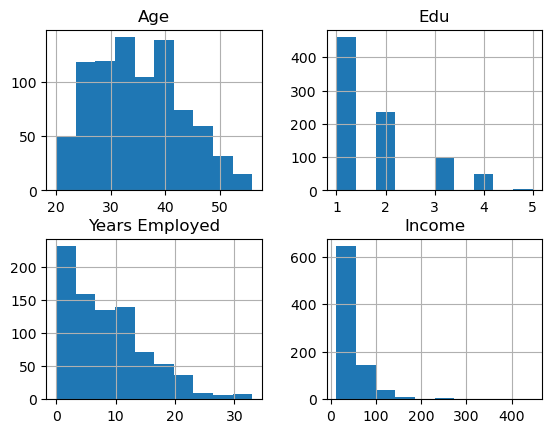

In [6]:
df[['Age','Edu','Years Employed','Income']].hist();

Key Findings:

    1.Average age of the customer is 35.
    2.Average years employed of the customer is 8.5 years.
    3.Average income of the customer is 47 units.
    4.Maximum number of cutomers defualted in debt repayment.
    5.Average Customer defaulted more on other debts than card debt.
    6.Debt-income ratio of a average customer is 10.17 .

In [7]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
x1=df.values
x1=np.nan_to_num(x1)
x=StandardScaler().fit_transform(x1)
x[0:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

In [8]:
#modeling
from sklearn.cluster import KMeans
kmeans=KMeans(init='k-means++',n_clusters=3,n_init=12)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=12)

In [9]:
labels=kmeans.labels_

In [10]:
df['clus']=labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus
0,41,2,6,19,0.124,1.073,0.0,6.3,2
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,2
4,47,1,31,253,9.308,8.908,0.0,7.2,1


In [11]:
df.groupby("clus").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus,,,,,,,,
0,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


k-means will partition customers into mutually exclusive groups into 3 clusters.The 3 clusters here can be:

    1.AFFLUENT, EDUCATED AND OLD AGED (1)
    2.MIDDLE AGED AND MIDDLE INCOME (2)
    3.YOUNG AND LOW INCOME (0)